<a href="https://colab.research.google.com/github/KimTaesong/AI_project/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC%EC%A0%9CHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0 사용할 패키지 불러오기
from keras.models import Sequential # 케라스의 Sequential()을 임포트
from keras.layers import Dense, Activation # 케라스의 Dense()를 임포트
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import LSTM

# 판다스로 csv파일을 읽어오기
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/heartbeat_datasets.csv")
# csv 파일이 잘 읽히는지 확인
print(df.values)
# 데이터 파악
print(df.values.shape)
# 데이터는 총 270개 샘플로 구성되어져 있으며 988개의 열로 구성
print(df)
# 각 샘플의 인덱스는 986개의 시간별 심장박동률의 열과 심장의 상태를 나타내는 1개의 열이 있다.
# Class열은 몇 가지 데이터로 구성되어져있는지 모든 데이터 종류출력
print("Class 종류:", df["Class"].unique(), sep="\n")
# Class열의 심장 데이터 구성 비율을 파악
df['Class'].value_counts().plot(kind='bar')

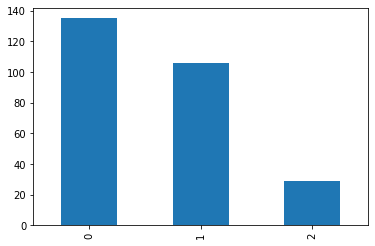

In [ ]:
df['Class'] = df['Class'].replace(['Baseline', 'VT', 'VF'],[0,1,2])
# Baseline은 0 VT는 1 VF는 2로 변환해서 코딩.
df['Class'].value_counts().plot(kind='bar')
#데이터의 분포가 Baseline, VT, VF의 비율이 일정하지 않음

In [ ]:
# 랜덤시드 고정시키기
np.random.seed(5)

# 1 데이터 준비하기
mah_np_array = df.values
dataset = mah_np_array
print(dataset)

[[   3  970  970 ...  950  950    0]
 [   3  730  760 ...  240  240    1]
 [   3  620  940 ...  700  700    0]
 ...
 [8079  820  490 ...  270  280    1]
 [8096 1080 1070 ... 1200 1170    0]
 [8096  740  740 ...  320  290    1]]


In [146]:
#2 데이터셋 생성하기

# Training and testing dataset 분리, 필요시 validation dataset 분리

# Training dataset
x_train = dataset[0:200,1:-1]
# print(x_train)
y_train = dataset[0:200,-1]
print(y_train)
# print(y_train)

# Validation dataset
x_val = dataset[250:,1:-1]
y_val = dataset[250:,-1]
# print(x_val)
# testing dataset
x_test = dataset[200:250,1:-1]
y_test = dataset[200:250,-1]
# print(y_train, y_val, y_test)
# 모델 변경, shape을 다시 잡아줌
# reshape for lstm
x_train = np.reshape(x_train,(len(x_train), 986, 1))
x_val = np.reshape(x_val,(len(x_val), 986, 1))
x_test = np.reshape(x_test,(len(x_test), 986, 1))


# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0 1 0 1 0 1 0 2
 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 1 0 2 0 2 0 1 0
 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1]
(200, 986, 1)
(200, 3)
(20, 986, 1)
(20, 3)
(50, 986, 1)
(50, 3)


In [154]:
#3. 모델 구성하기
model = Sequential()
#LSTM의 활성화함수 디폴트: 탄젠트 하이퍼볼릭 함수, relu를 써도 되지만 결과가 좋지 않음
model.add( LSTM(32, input_shape=(986,1)))
model.add( Dense(32,activation='relu'))
model.add( Dense(8,activation='relu'))
model.add(Dense(y_train.shape[1], activation= 'softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 27        
Total params: 5,699
Trainable params: 5,699
Non-trainable params: 0
_________________________________________________________________


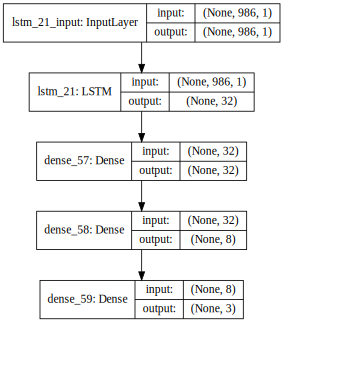

In [148]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi = 60).create(prog='dot', format='svg'))

In [151]:
#4 모델컴파일 학습과정 설정하기
# loss 현재 가중치 세트 평가하는데 사용한 손실 함수.
# optimizer 최적의 가중치 검색하는데 사용되는 최적화 알고리즘 효율적인 경사 하강법 알고리즘 중 하나인 'adam'을 사용
# metrics 평가 척도를 나타내며 분류 문제에서는 일반적으로 'accuracy'으로 지정

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 시각화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True, dpi = 60).create(prog='dot', format='svg'))


#5 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 50) # 조기종료 콜백함수 정의
hist= model.fit(x_train, y_train, epochs=1000, batch_size=50,validation_data=(x_val, y_val),callbacks=[early_stopping])


Train on 200 samples, validate on 20 samples
Epoch 1/1000
200/200 [==============================] - 3s 13ms/step - loss: 0.1482 - accuracy: 0.9250 - val_loss: 0.2956 - val_accuracy: 0.9500
Epoch 2/1000
200/200 [==============================] - 2s 10ms/step - loss: 0.2602 - accuracy: 0.9300 - val_loss: 0.0269 - val_accuracy: 1.0000
Epoch 3/1000
200/200 [==============================] - 2s 10ms/step - loss: 0.1175 - accuracy: 0.9600 - val_loss: 0.0537 - val_accuracy: 1.0000
Epoch 4/1000
200/200 [==============================] - 2s 10ms/step - loss: 0.1427 - accuracy: 0.9450 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 5/1000
200/200 [==============================] - 2s 10ms/step - loss: 0.1106 - accuracy: 0.9600 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 6/1000
200/200 [==============================] - 2s 10ms/step - loss: 0.1227 - accuracy: 0.9500 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 7/1000
200/200 [==============================] - 2s 10ms/step - loss: 0.1078 -

<Figure size 72x72 with 0 Axes>

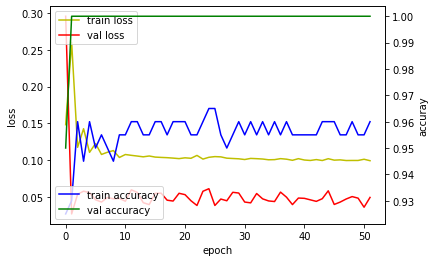

In [152]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [153]:
# 학습 과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

#6모델 평가하기
scores = model.evaluate(x_test, y_test)
print('loss : ' + str(scores[0]))
print('accuray : ' + str(scores[1]))
print("acc: %f" %(scores[1]*100))
print('')

## training loss and acc ##
[0.14822698757052422, 0.26017432659864426, 0.11746567487716675, 0.14273601770401, 0.11060893535614014, 0.12266362830996513, 0.10775282420217991, 0.11078295111656189, 0.1130518727004528, 0.10366900265216827, 0.10768212750554085, 0.10657569579780102, 0.1055920347571373, 0.10454017482697964, 0.10567997954785824, 0.10417811572551727, 0.10374049469828606, 0.10338724218308926, 0.10279167490079999, 0.10209682304412127, 0.1031905971467495, 0.10255683399736881, 0.10646100342273712, 0.10145442560315132, 0.10390708968043327, 0.10483778174966574, 0.10447564907371998, 0.10270446725189686, 0.10227414779365063, 0.10185880120843649, 0.1008691880851984, 0.10238934680819511, 0.10202448256313801, 0.10155917145311832, 0.1005277531221509, 0.1007213732227683, 0.10207735281437635, 0.10133431944996119, 0.09981347341090441, 0.10204642359167337, 0.10020836442708969, 0.09959992580115795, 0.10078540444374084, 0.09952526586130261, 0.10199180338531733, 0.10002282727509737, 0.100399811752